# Project Data Science- Early Classification of Diabetes 
# Hashem Almubarak 


                    
                                              
                                     
                                            
                                         

# Problem description

According to a World Health Organization (WHO) research from 2018, diabetes is one of the chronic, life-threatening diseases with the greatest rate of growth, having already afflicted 422 million people globally. For a clinically significant outcome, early identification of diabetes is usually preferred due to the existence of a relatively long asymptomatic period. Due to the long-term asymptomatic phase of diabetes, approximately 50% of those who have it go untreated.

This dataset includes 520 observations with 17 characteristics that were gathered from patients at the Sylhet Diabetes Hospital in Sylhet, Bangladesh, utilizing direct surveys and diagnostic findings.

# Objectives


#### • Create a classification model to predict diabetes.
#### • Examine the most prevalent characteristics linked to diabetes risk.
#### • Interpret the results of the analysis and provide recommendations for healthcare providers based on the insights gained.
#### • Perform data pre-processing tasks such as handling missing data, dealing with outliers, and scaling or normalizing the data.

# Hypothesis

Machine learning models can accurately predict the early onset of diabetes based on a combination of demographic, lifestyle, and clinical risk factors, and outperform traditional risk prediction models.

# Data description

### Variables identification
The column headings age, genderm polyuria, polydipsia, sudden_weight_loss ,weakness polyphagia genital_thrush; visual_blurring , itching, irritability, delayed_healing; partial_paresis, muscle_stiffn. 

### Types identification
Age is Numerical Data.
Gender is Categorical Data.
Polyuria, polydipsia, sudden_weight, weakness, polyphagia, genital_thrus, visual_blurring, itching, irritability, delayed_healing, partial_paresis, muscle_stiffness are Nominal Data.


# Data Preparation

In [31]:
import pandas as pd
# Reading data
df = pd.read_csv('diabetes_data (1).csv', delimiter = ',')
display(df.head())
# Check data type
display(df.info())

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

None

In [32]:
#Solving any negative value to make it 0 or 1
seleted_cols= df.select_dtypes(exclude='object').columns
df[seleted_cols]=df[seleted_cols].applymap(lambda x: x if x>=0 else abs(x))
display(df)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [33]:
# checking Nan values
null_columns=df.columns[df.isna().any()]
print('Columns with NaN values are:', null_columns)
# NO Nan values in df

Columns with NaN values are: Index([], dtype='object')


In [34]:
# checking uniqe values
print(df.select_dtypes("object").describe().loc['unique', :])
df['gender'].unique().tolist()


gender    2
Name: unique, dtype: object


['Male', 'Female']

In [71]:

# Looks fine
# All possible cleaning techinques applied to this df and the data is ready for the next step

# Model Planning

In [35]:
## data statistical summaries 
num_columns = df.select_dtypes(exclude='object').columns
cat_columns = df.select_dtypes(include='object').columns

print(f'Numerical columns are: {num_columns.tolist()}')
display(df.describe(include='number'))

print(f'Non-numerical columns are: {cat_columns.tolist()}')
display(df.describe(include='object'))


Numerical columns are: ['age', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class']


,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Non-numerical columns are: ['gender']


,gender
count,520
unique,2
top,Male
freq,328


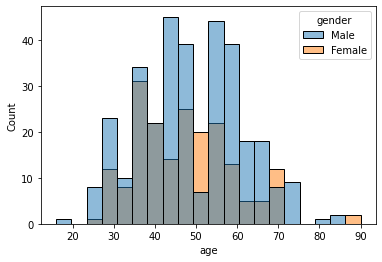

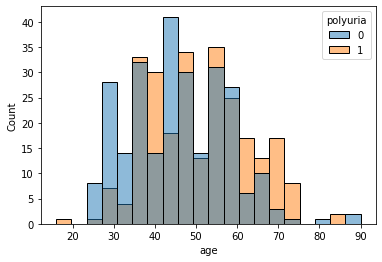

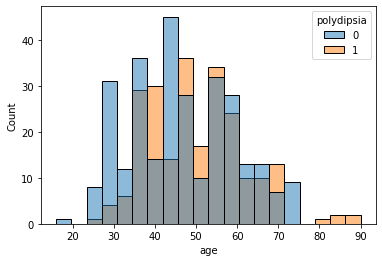

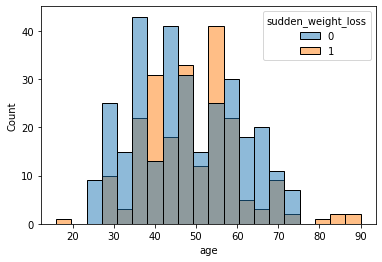

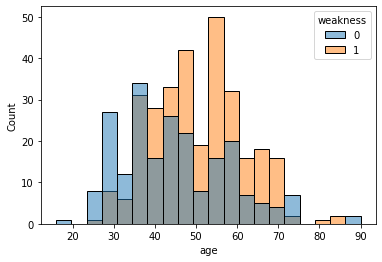

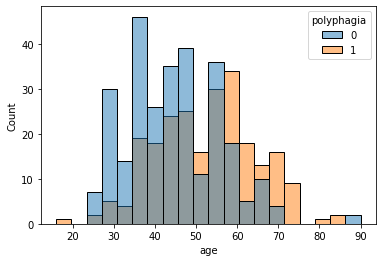

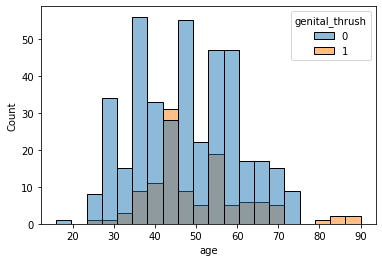

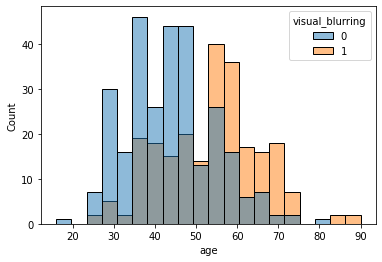

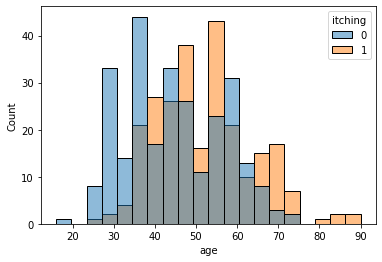

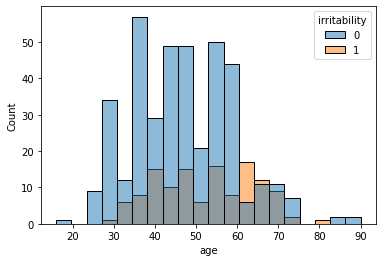

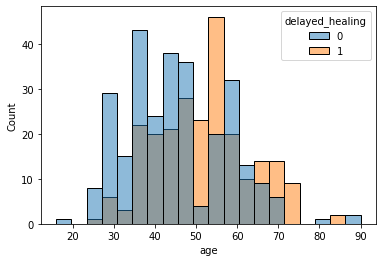

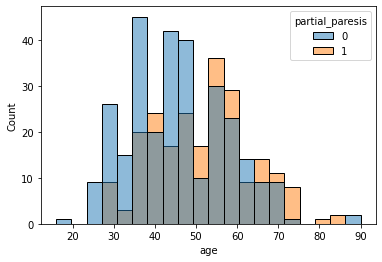

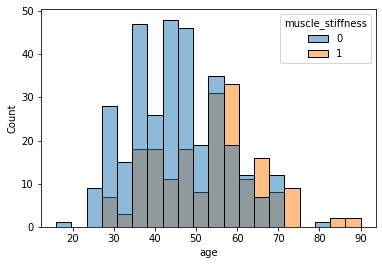

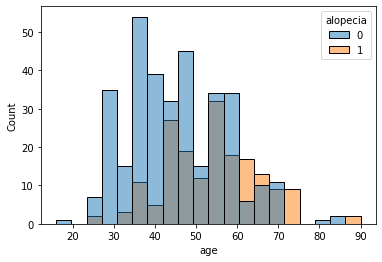

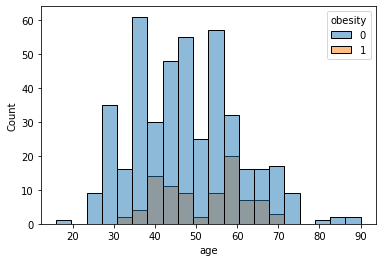

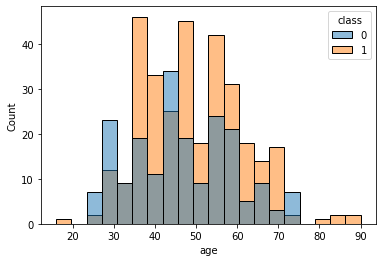

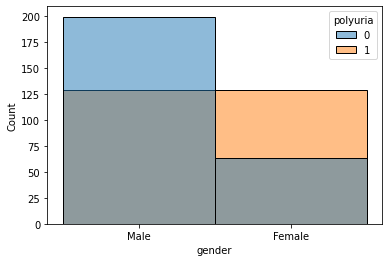

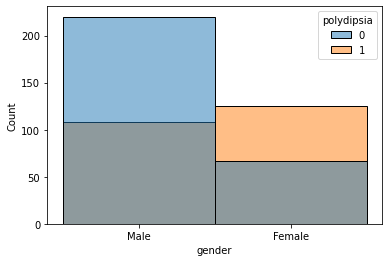

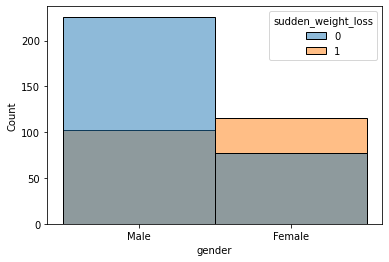

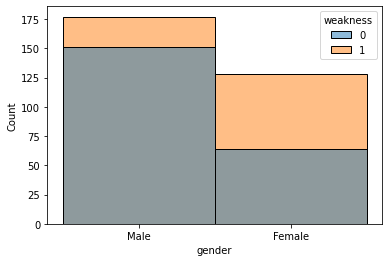

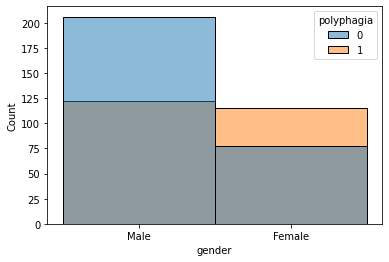

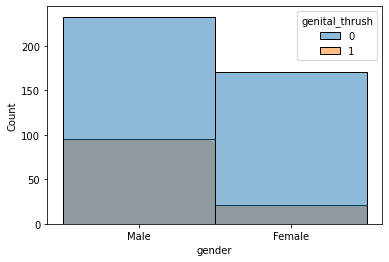

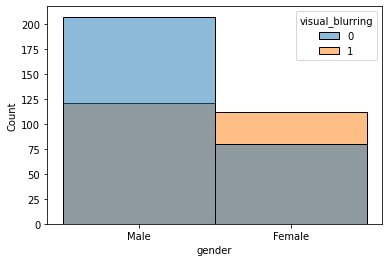

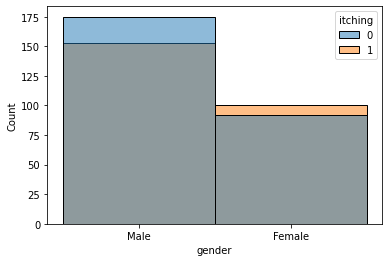

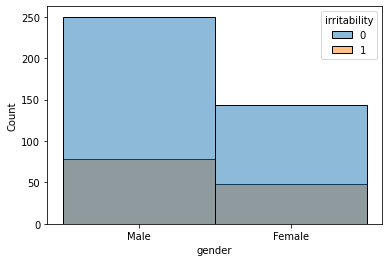

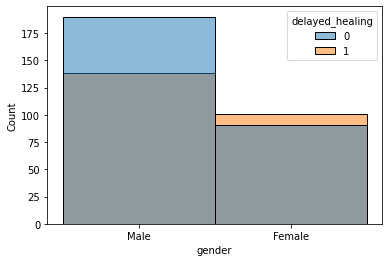

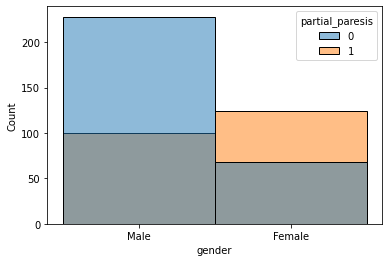

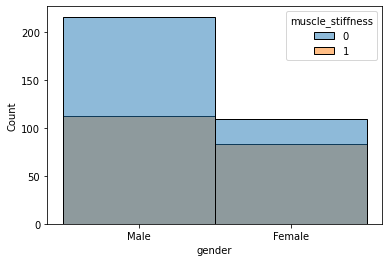

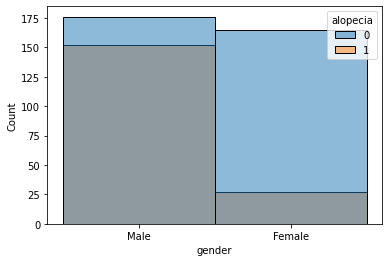

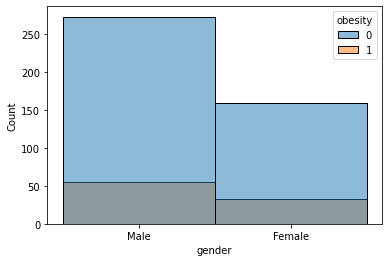

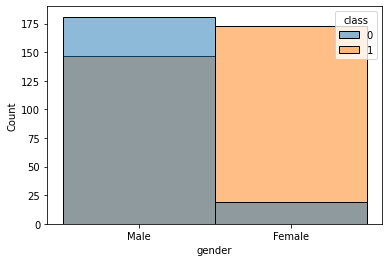

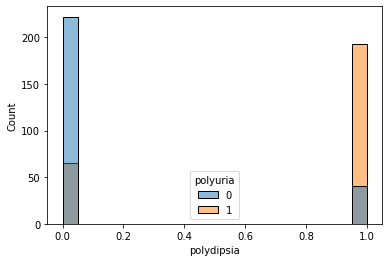

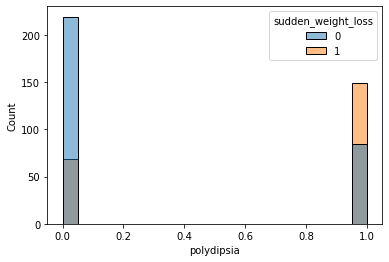

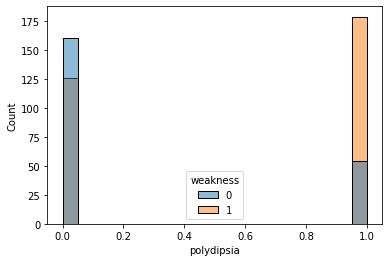

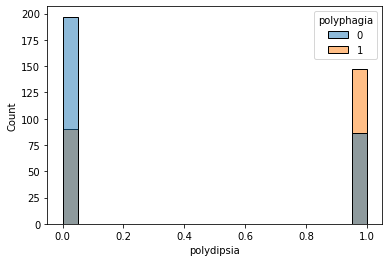

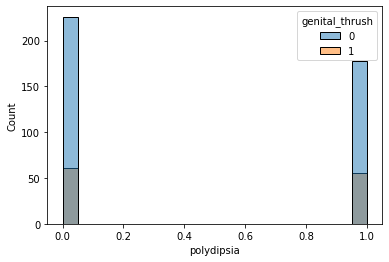

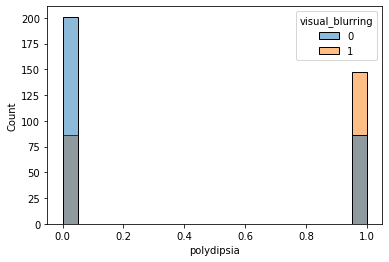

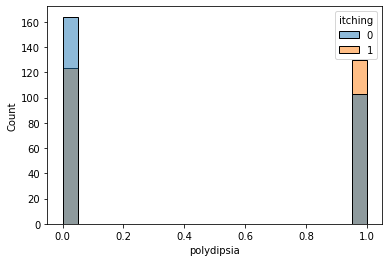

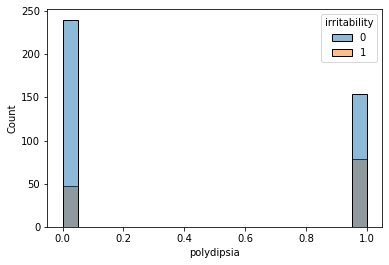

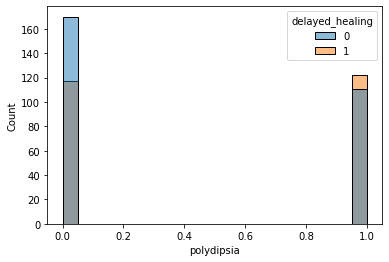

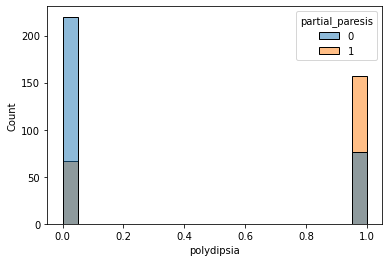

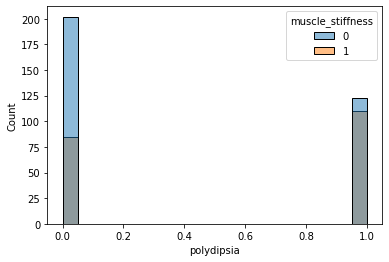

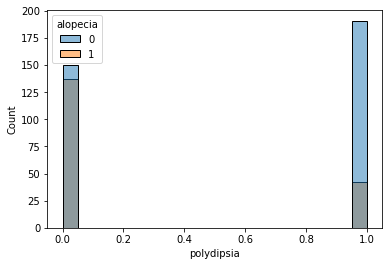

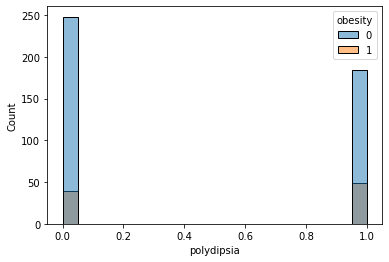

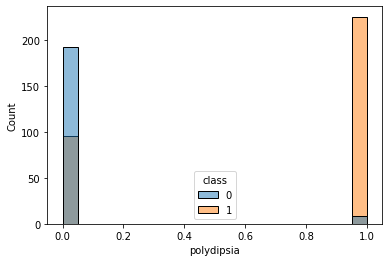

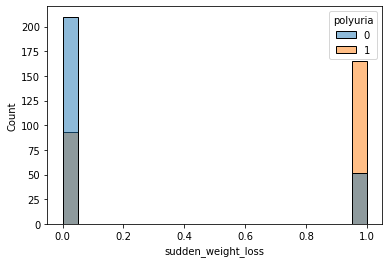

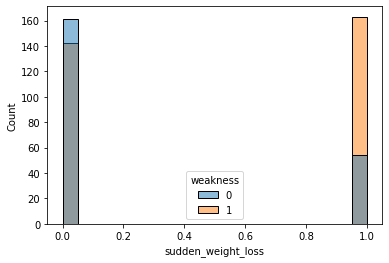

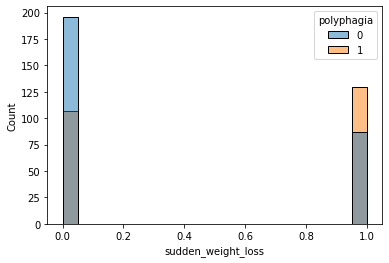

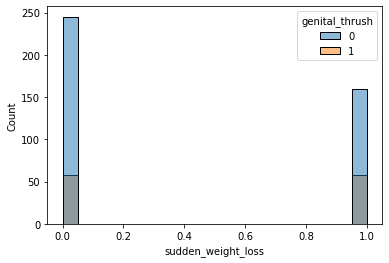

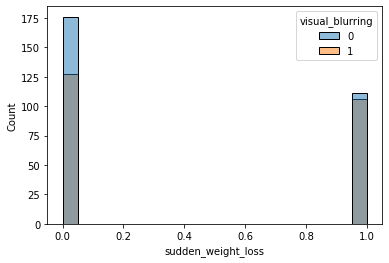

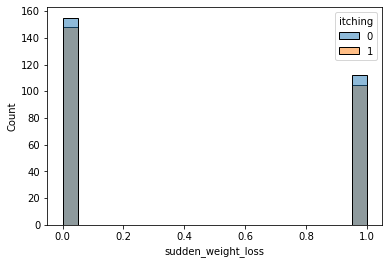

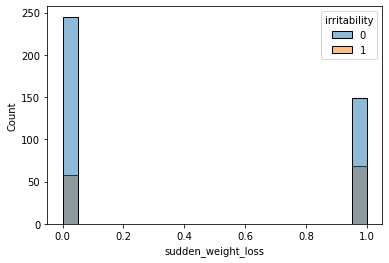

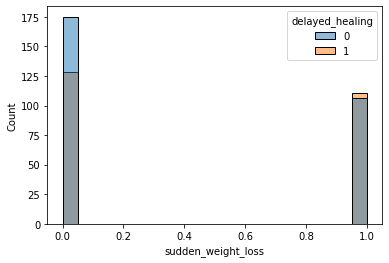

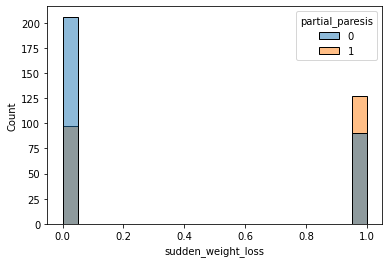

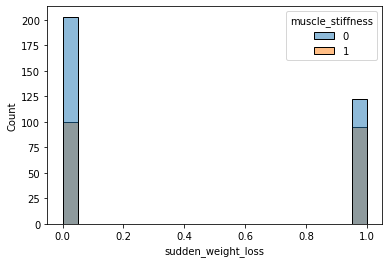

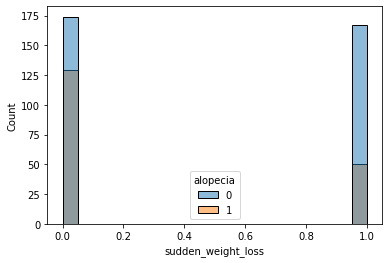

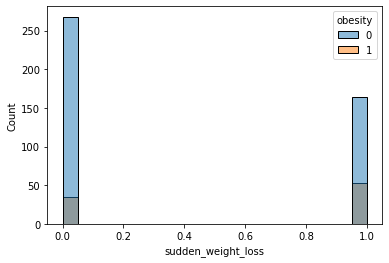

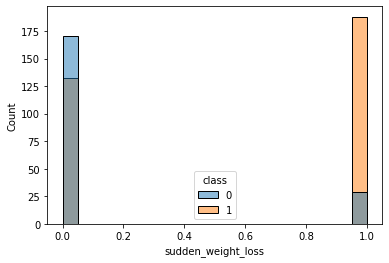

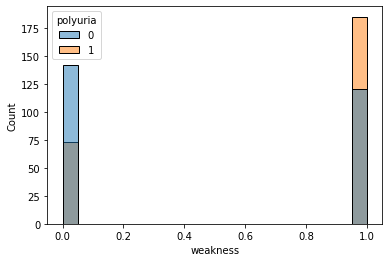

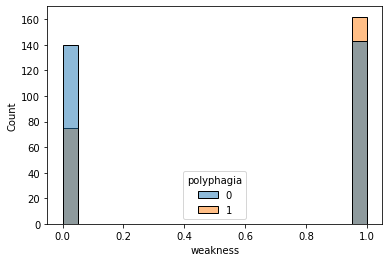

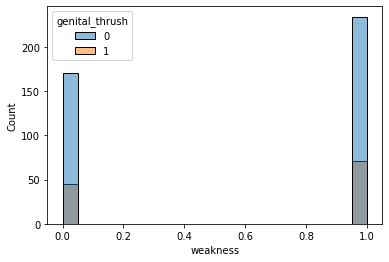

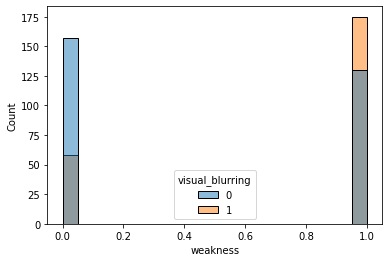

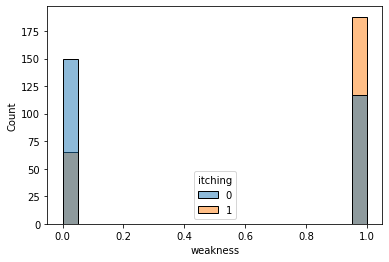

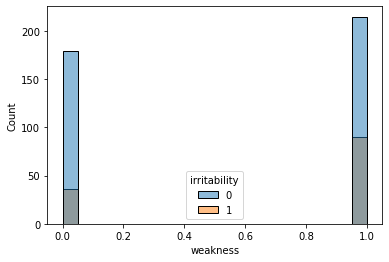

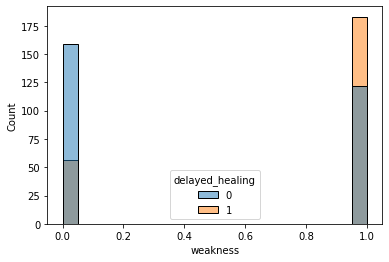

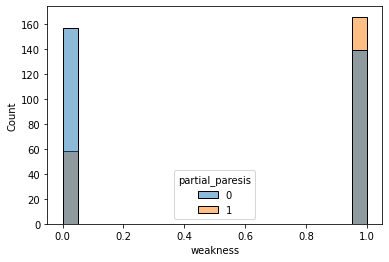

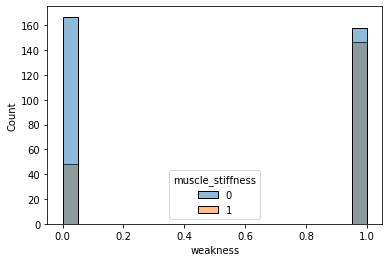

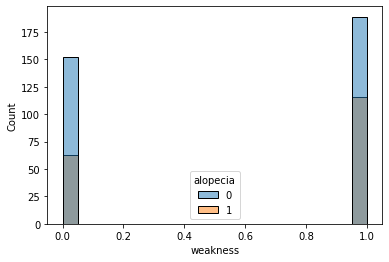

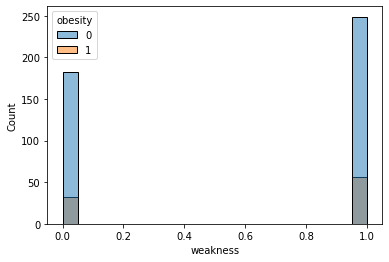

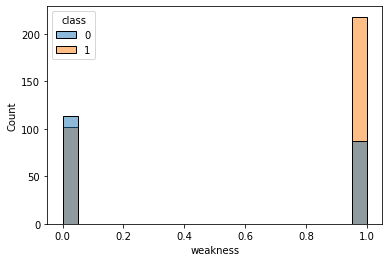

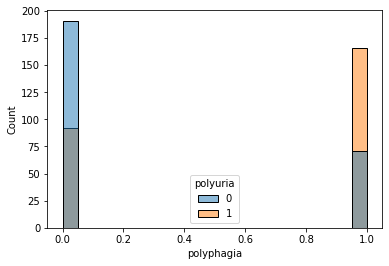

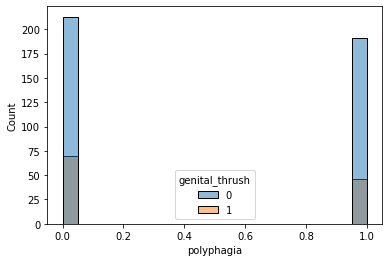

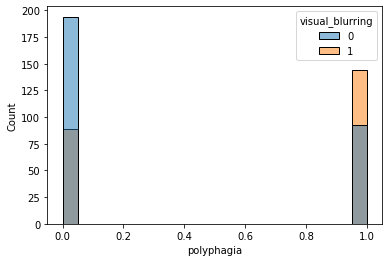

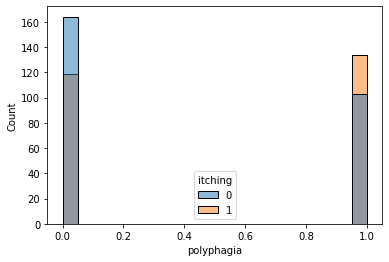

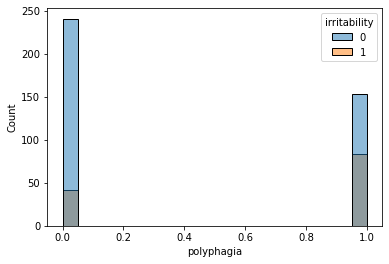

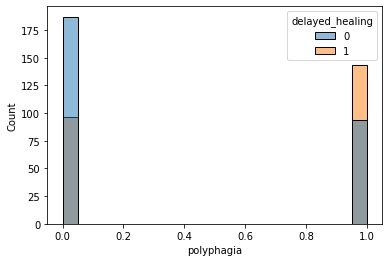

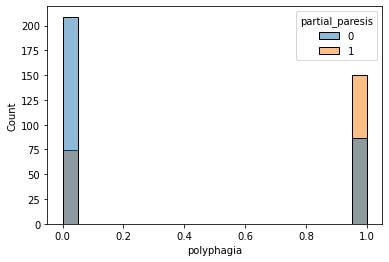

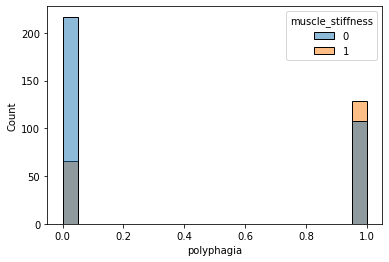

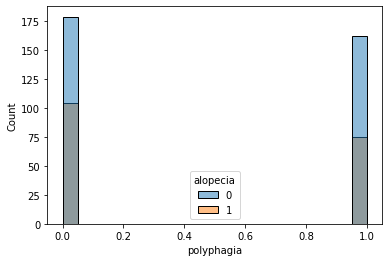

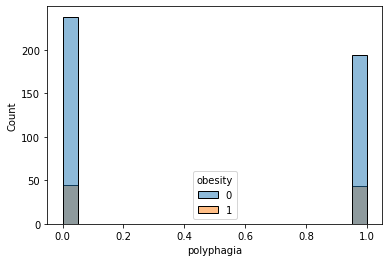

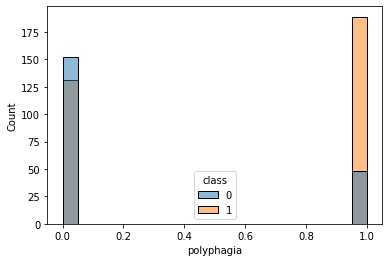

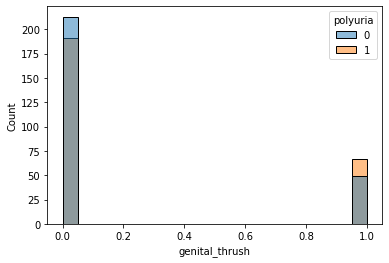

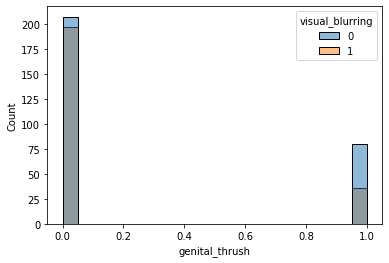

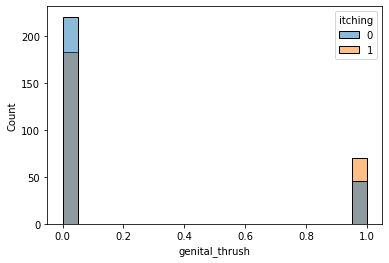

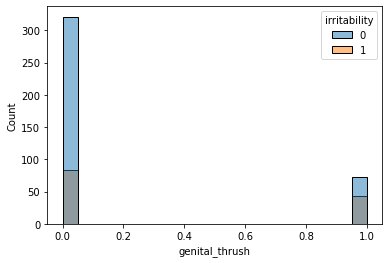

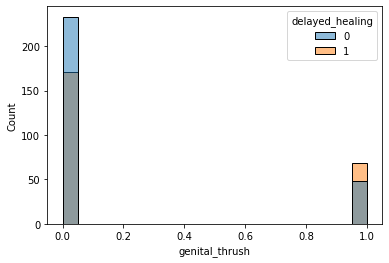

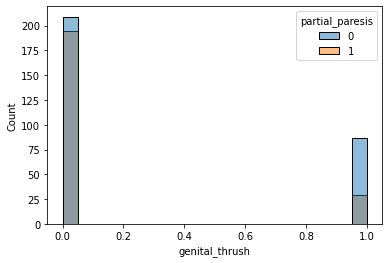

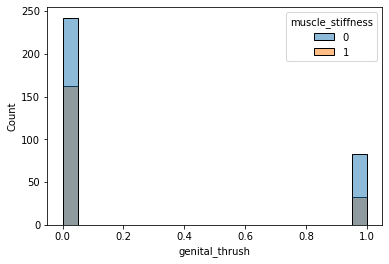

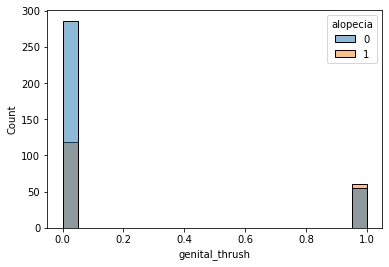

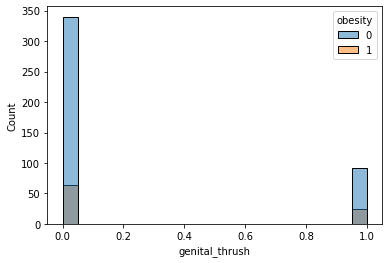

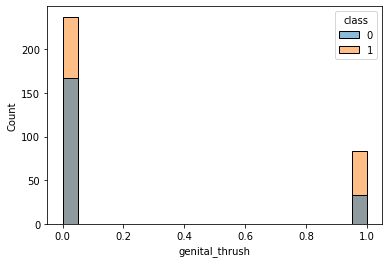

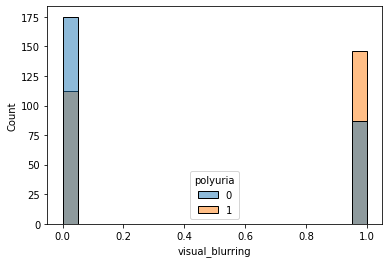

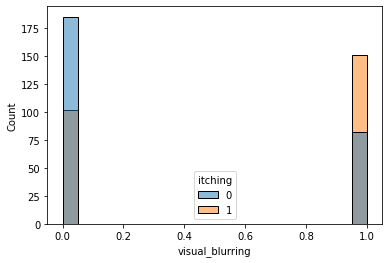

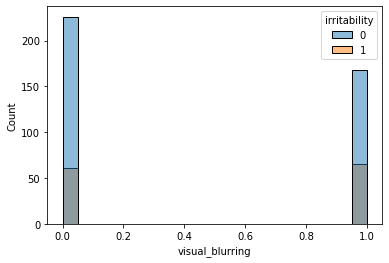

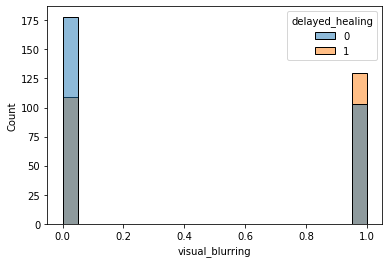

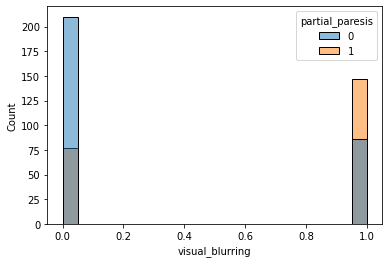

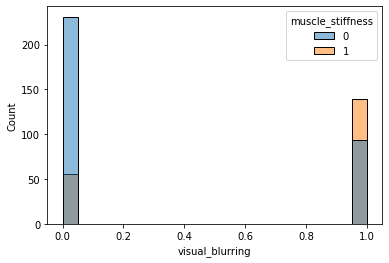

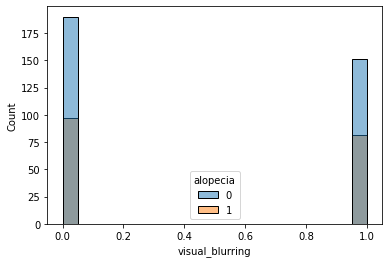

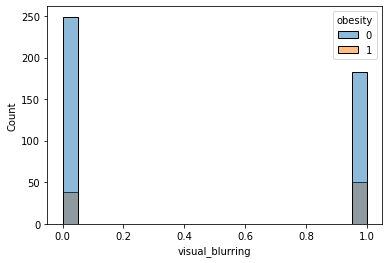

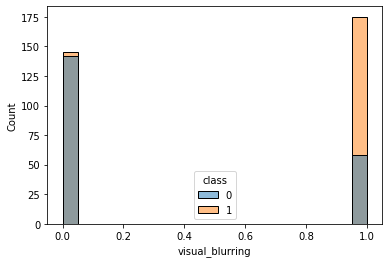

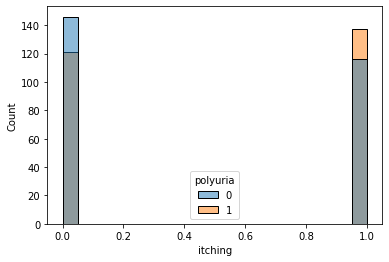

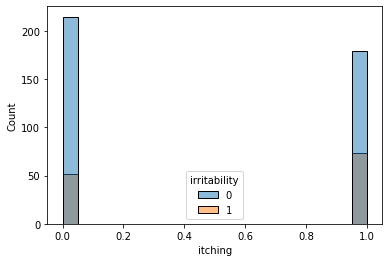

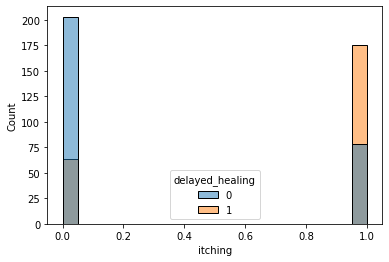

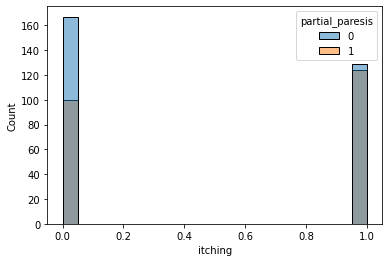

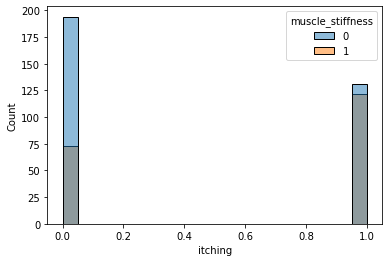

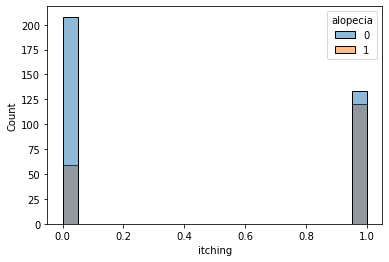

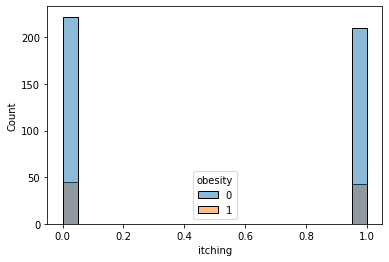

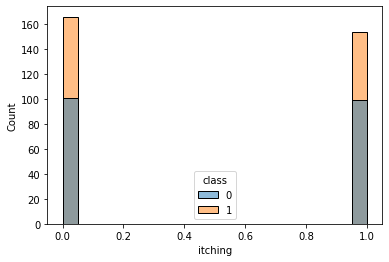

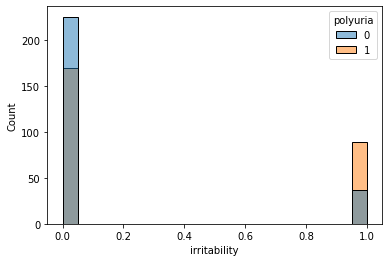

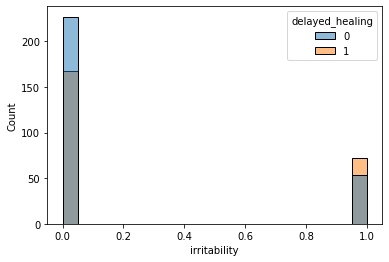

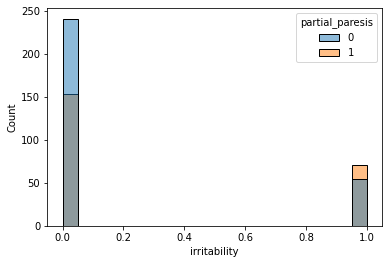

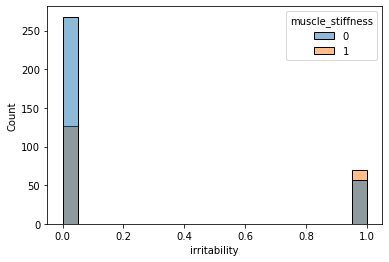

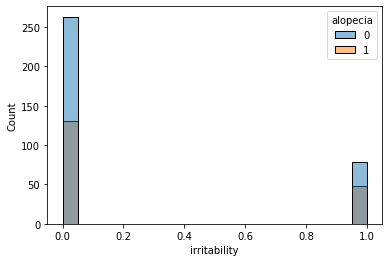

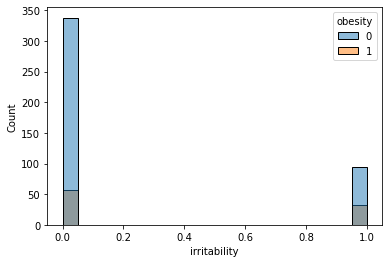

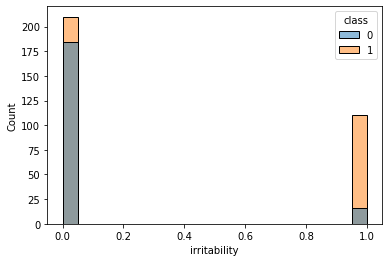

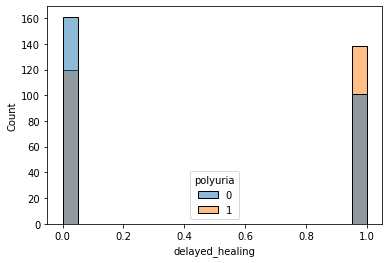

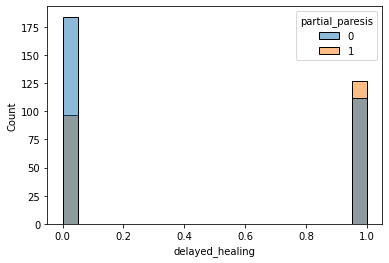

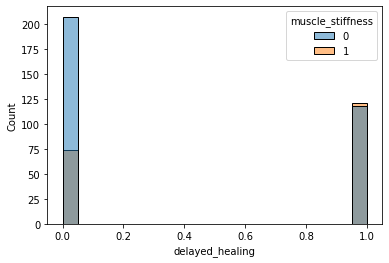

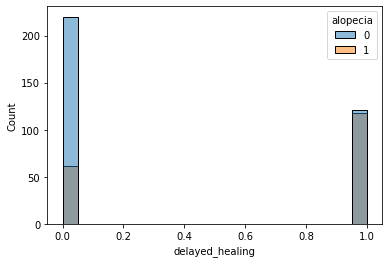

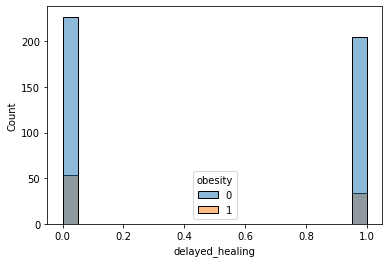

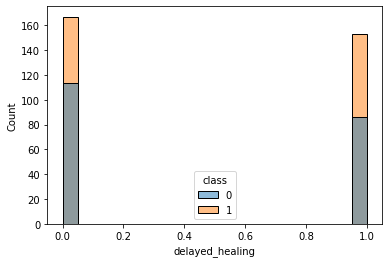

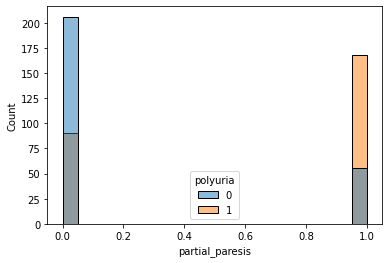

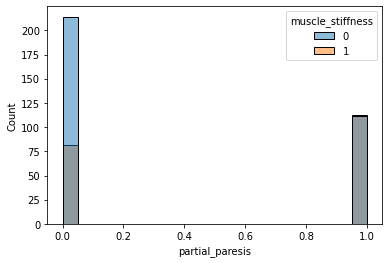

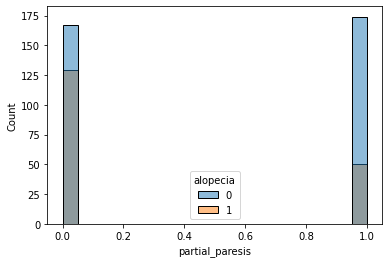

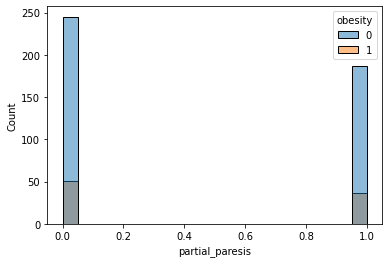

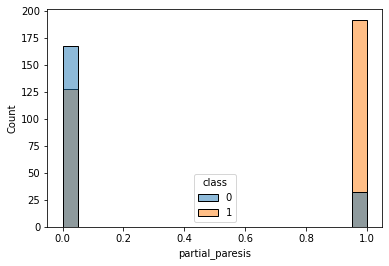

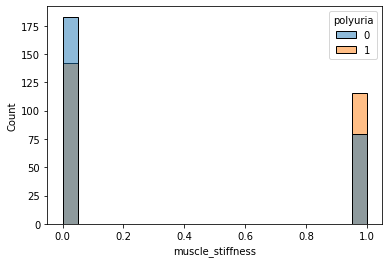

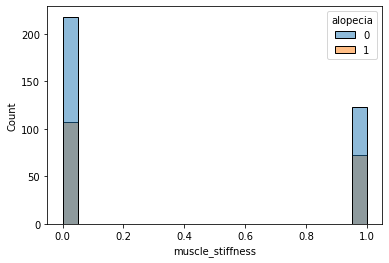

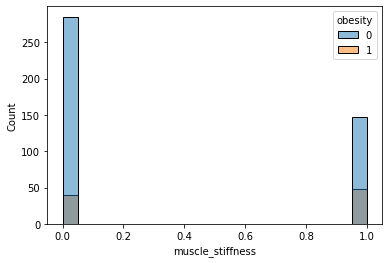

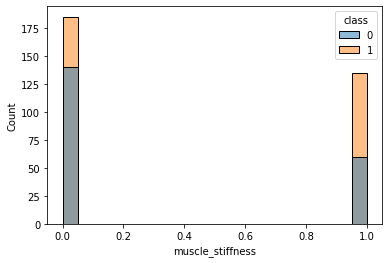

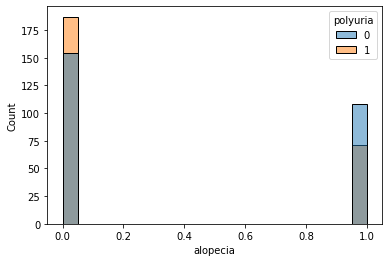

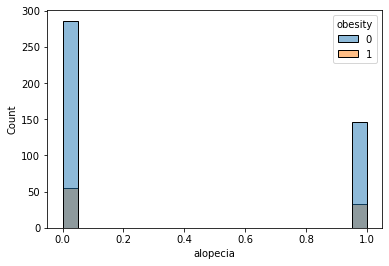

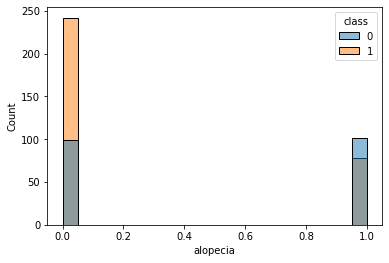

In [36]:
# since the data is catagorical, historgams are drawn for each pair of variables
import matplotlib.pyplot as plt
import seaborn as sns

# selected columns
sel_columns = df.loc[:, df.columns != 'age']

for c in sel_columns:
    plt.figure()
    sns.histplot(x='age', hue=c,bins=20,data=df);
    plt.show()
  
sel2_columns = df.loc[:, ~df.columns.isin(['age', 'gender'])]
for c in sel2_columns:
    plt.figure()
    sns.histplot(x='gender', hue=c,bins=20,data=df);
    plt.show()
    
sel3_columns = df.loc[:, ~df.columns.isin(['age', 'gender', 'polydipsia'])]
for c in sel3_columns:
    plt.figure()
    sns.histplot(x='polydipsia', hue=c,bins=20,data=df);
    plt.show()
    
sel4_columns = df.loc[:, ~df.columns.isin(['age', 'gender', 'polydipsia', 'sudden_weight_loss'])]    
for c in sel4_columns:
    plt.figure()
    sns.histplot(x='sudden_weight_loss', hue=c,bins=20,data=df);
    plt.show()
    
sel5_columns = df.loc[:, ~df.columns.isin(['age', 'gender', 'polydipsia', 'sudden_weight_loss','weakness'])]     
for c in sel5_columns:
    plt.figure()
    sns.histplot(x='weakness', hue=c,bins=20,data=df);
    plt.show()
    
sel6_columns = df.loc[:, ~df.columns.isin(
    ['age', 'gender', 'polydipsia', 'sudden_weight_loss','weakness', 'polyphagia'])]
for c in sel6_columns:
    plt.figure()
    sns.histplot(x='polyphagia', hue=c,bins=20,data=df);
    plt.show()
    
sel7_columns = df.loc[:, ~df.columns.isin(
    ['age', 'gender', 'polydipsia', 'sudden_weight_loss','weakness', 'polyphagia', 'genital_thrush'])]    
for c in sel7_columns:
    plt.figure()
    sns.histplot(x='genital_thrush', hue=c,bins=20,data=df);
    plt.show()
    
sel8_columns = df.loc[:, ~df.columns.isin(
    ['age', 'gender', 'polydipsia', 'sudden_weight_loss','weakness', 'polyphagia', 'genital_thrush', 'visual_blurring'])]
for c in sel8_columns:
    plt.figure()
    sns.histplot(x='visual_blurring', hue=c,bins=20,data=df);
    plt.show()
    
sel9_columns = df.loc[:, ~df.columns.isin(
    ['age', 'gender', 'polydipsia', 'sudden_weight_loss',
     'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching'])]    
for c in sel9_columns:
    plt.figure()
    sns.histplot(x='itching', hue=c,bins=20,data=df);
    plt.show()
    
sel10_columns = df.loc[:, ~df.columns.isin(
    ['age', 'gender', 'polydipsia', 'sudden_weight_loss',
     'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability'])] 
for c in sel10_columns:
    plt.figure()
    sns.histplot(x='irritability', hue=c,bins=20,data=df);
    plt.show()
sel11_columns = df.loc[:, ~df.columns.isin(
    ['age', 'gender', 'polydipsia', 'sudden_weight_loss',
     'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing'])]
for c in sel11_columns:
    plt.figure()
    sns.histplot(x='delayed_healing', hue=c,bins=20,data=df);
    plt.show()
sel12_columns = df.loc[:, ~df.columns.isin(
    ['age', 'gender', 'polydipsia', 'sudden_weight_loss',
     'weakness', 'polyphagia', 
     'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis' ])]
for c in sel12_columns:
    plt.figure()
    sns.histplot(x='partial_paresis', hue=c,bins=20,data=df);
    plt.show()
sel13_columns = df.loc[:, ~df.columns.isin(
    ['age', 'gender', 'polydipsia', 'sudden_weight_loss',
     'weakness', 'polyphagia', 
     'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis',
     'muscle_stiffness'  ])] 
for c in sel13_columns:
    plt.figure()
    sns.histplot(x='muscle_stiffness', hue=c,bins=20,data=df);
    plt.show()
sel14_columns = df.loc[:, ~df.columns.isin(
    ['age', 'gender', 'polydipsia', 'sudden_weight_loss',
     'weakness', 'polyphagia', 
     'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis',
     'muscle_stiffness', 'alopecia' ])]
for c in sel14_columns:
    plt.figure()
    sns.histplot(x='alopecia', hue=c,bins=20,data=df);
    plt.show()

In [18]:
# finding PCA
num_columns = df.select_dtypes(exclude='object').columns
pca_input_columns=num_columns.drop(['class']) # we consider it as output column

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # get pca model

principalComponents = pca.fit_transform(df[pca_input_columns]) # get two components

df['pca1'] = principalComponents[:,0]
df['pca2'] = principalComponents[:,1]


display(df)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,pca1,pca2
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,-8.009937,-0.034334
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,9.958553,-0.842588
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,-6.999386,0.171870
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,-3.029334,-0.047950
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,12.033395,1.271434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,-9.014197,1.085043
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,-0.004109,1.282651
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,9.992193,1.105998
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,-16.010210,-0.282489


In [53]:
#the variance captured by each principal component

for ind,var in enumerate(pca.explained_variance_ratio_):
    print(f'The variance captured by pca {ind+1} is: {var*100: 0.2f}%')

The variance captured by pca 1 is:  98.02%
The variance captured by pca 2 is:  0.50%


#### the high variance captured by PCA 1 (98.02%) suggests that it contains valuable information and plays a crucial role in explaining the patterns or structure of the data. Meanwhile, the low variance captured by PCA 2 (0.50%) indicates that it provides relatively less meaningful information and may have limited impact on understanding the dataset beyond what is already captured by PCA 1.

In [20]:
#the coefficients of the linear combination of the columns. 
pca_1_coefficients=np.round(pca.components_[0],4)

zipList=list(zip(pca_input_columns,pca_1_coefficients))
ndf=pd.DataFrame.from_records(zipList,columns=['field','coeff'])

seleted_cols= ndf.select_dtypes(exclude='object').columns
ndf[seleted_cols]=ndf[seleted_cols].applymap(lambda x: x if x>=0 else abs(x)) # positive values

display(ndf.sort_values(by=['coeff'], ascending=False))
# the column with highest coeff is age

,field,coeff
0,age,0.9993
7,visual_blurring,0.0165
5,polyphagia,0.0130
13,alopecia,0.0126
12,muscle_stiffness,0.0123
8,itching,0.0122
10,delayed_healing,0.0106
11,partial_paresis,0.0095
4,weakness,0.0092
1,polyuria,0.0083


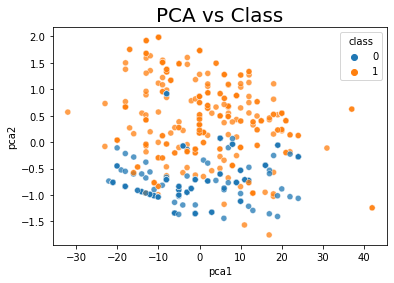

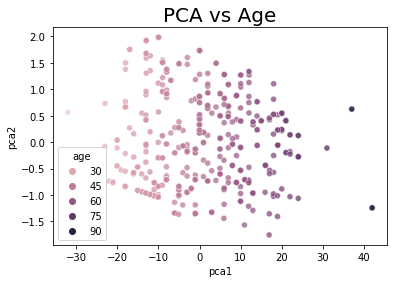

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
#
plt.figure()
sns.scatterplot(x='pca1',y='pca2',
            hue='class', #palette=sns.color_palette('coolwarm', n_colors=4),
            alpha=0.75,
            data=df)
plt.title('PCA vs Class', fontsize = 20)
plt.show()


plt.figure()
sns.scatterplot(x='pca1',y='pca2',
            hue='age', #palette=sns.color_palette('coolwarm', n_colors=51),
            alpha=0.75,
            data=df)
plt.title('PCA vs Age', fontsize = 20)
plt.show()

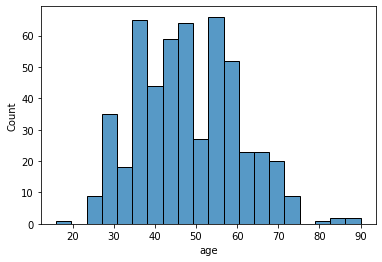

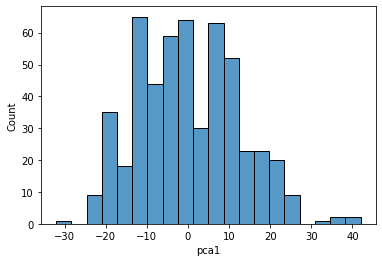

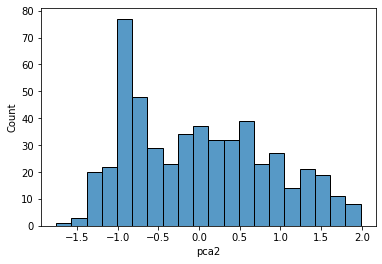

In [79]:
# continue for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(x='age',bins=20,data=df);
plt.show()

plt.figure()
sns.histplot(x='pca1',bins=20,data=df);
plt.show()

plt.figure()
sns.histplot(x='pca2',bins=20,data=df);
plt.show()

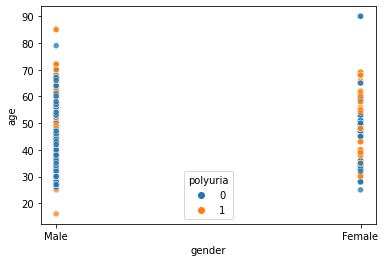

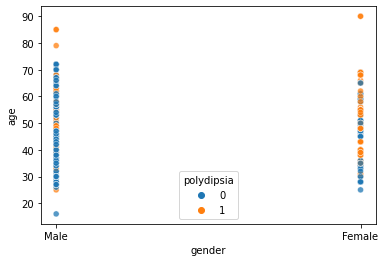

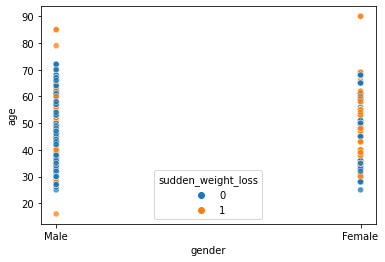

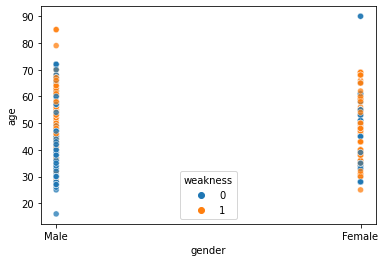

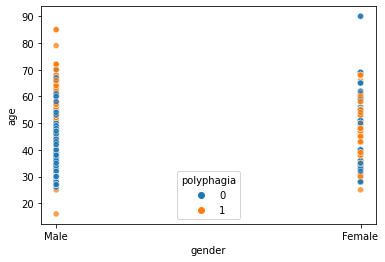

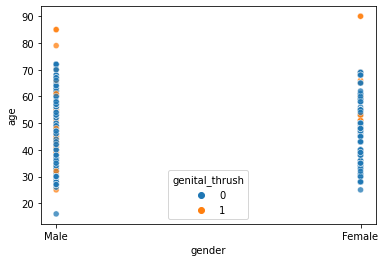

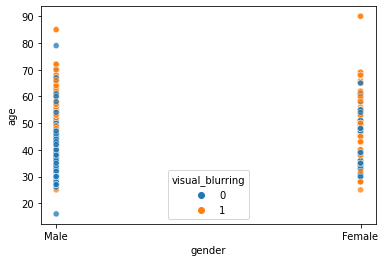

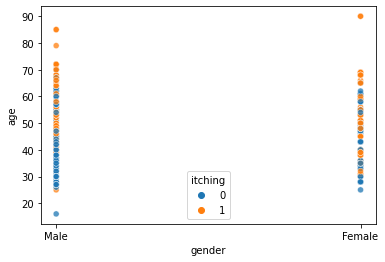

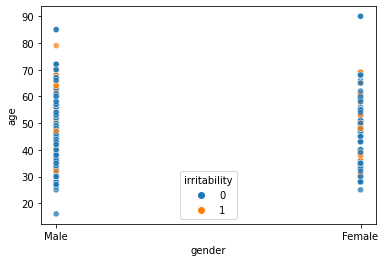

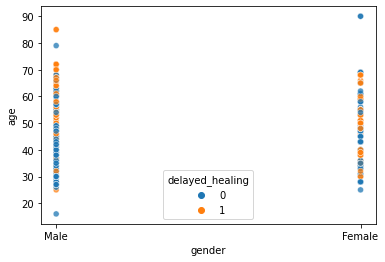

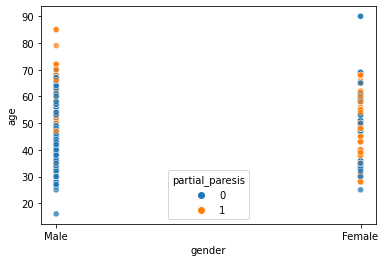

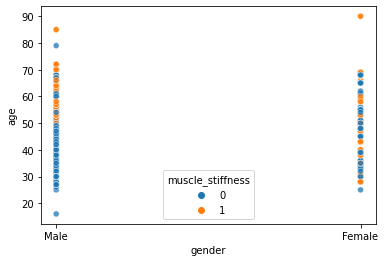

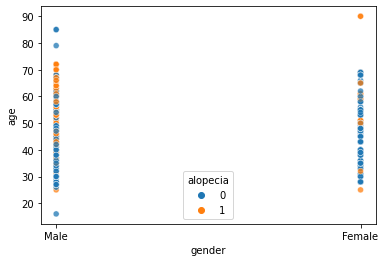

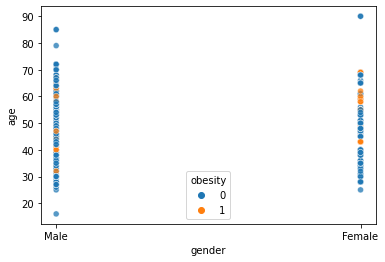

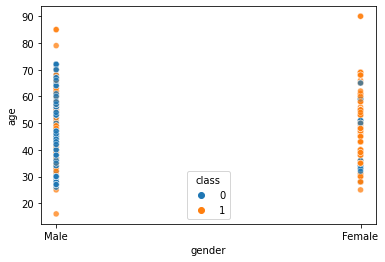

In [50]:

import matplotlib.pyplot as plt
import seaborn as sns

# selected columns
scatter_sel = df.loc[:, ~df.columns.isin(['age', 'gender'])]

for c in scatter_sel:
    plt.figure()
    sns.scatterplot(x='gender', y='age',
                    hue=c,
                    alpha=0.75
                    ,data=df);
    
    plt.show()
  

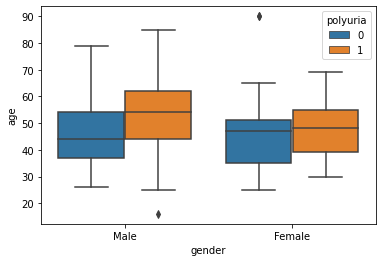

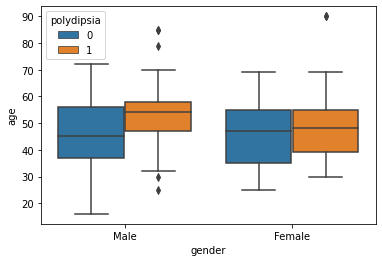

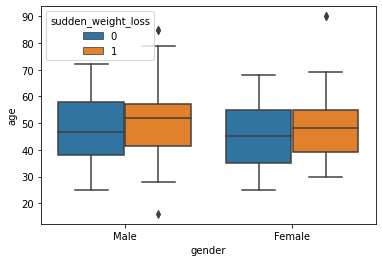

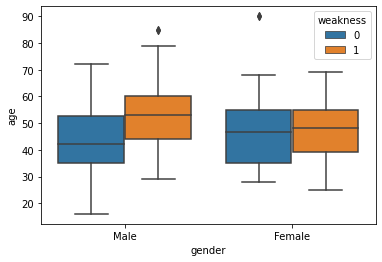

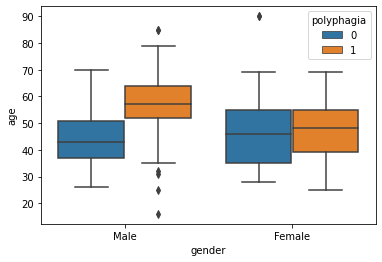

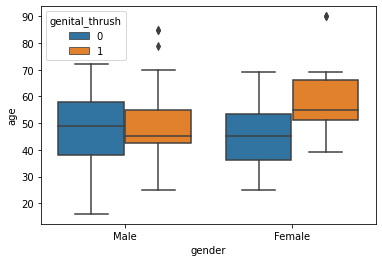

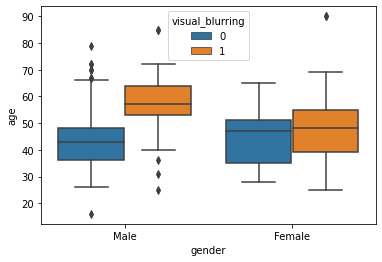

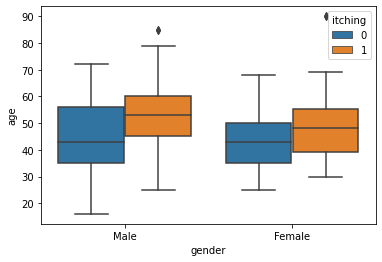

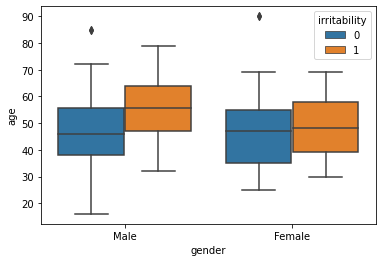

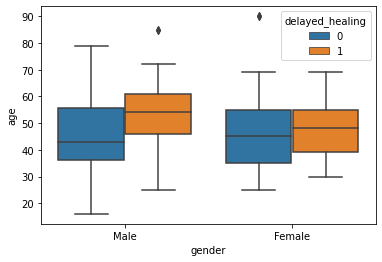

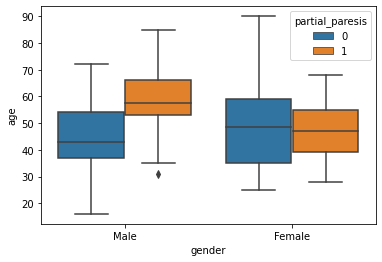

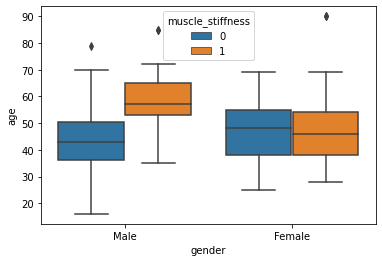

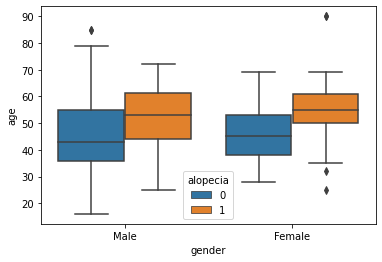

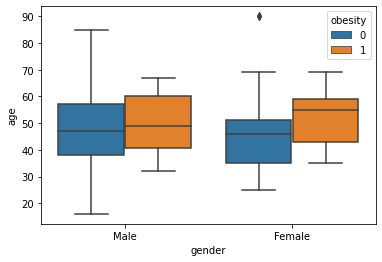

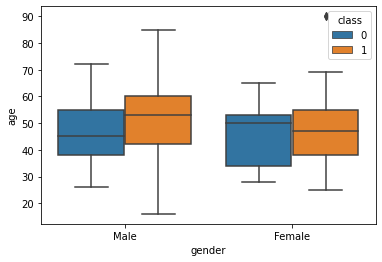

In [52]:

for c in scatter_sel:
    plt.figure()
    sns.boxplot(y='age',x='gender',hue=c,data=df);
    plt.show()
    


#### Based on your description and the boxplot visualization of the diabetes dataset, it appears that there is a correlation between age and the likelihood of having diabetes. The boxplot indicates that males tend to have a higher prevalence of diabetes compared to females.

#### The boxplot shows that for males, the values related to diabetes (polyuria, polydipsia, etc..) are generally higher, with a range of 45 to 60. On the other hand, for females, the values for these diabetes-related factors fall within a slightly lower range of 40 to 50.

#### This observation suggests that males in the dataset have more issues or symptoms associated with diabetes compared to females. It is important to note that this is a correlation and not necessarily a causal relationship. The dataset indicates that males tend to exhibit a combination of symptoms and factors that are commonly associated with diabetes, leading to a higher likelihood of being diagnosed with the condition.

# Summarise

To determine whether a specific dataset is best suited for classification using PCA and correlation, we need to consider several factors.

First, we need to determine whether the dependent variable in the dataset is categorical or binary. If the dependent variable is categorical or binary, then a classification model may be more appropriate.

Next, we can use correlation to identify potential predictors of the dependent variable. Variables that are highly correlated with the dependent variable may be good candidates for inclusion in a predictive model.

After identifying potential predictors, we can use PCA to reduce the dimensionality of the dataset and identify the most important variables that contribute to the variation in the data. We would typically select the principal components that explain the majority of the variance in the data and use them as input features for the classification model.


As a result, Classification model will be a greate choice

# Model Building

### Classification

In [1]:
#Test splits
import numpy as np
from sklearn.model_selection import train_test_split

X = df.iloc[:,2:-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


from sklearn import tree
dtClf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
dtClf = dtClf.fit(X_train,y_train)

import matplotlib.pyplot as plt
plt.figure(figsize =(10,10),dpi=1000)
tree.plot_tree(dtClf,feature_names=df.columns[:-1].tolist(),class_names=['0','1','2'],filled=True,rounded=True); 
plt.show()

#trees

dt_y_pred = dtClf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision Tree: \n")
print("Accuracy:=",  accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred) )

#random first

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
ndf = pd.get_dummies(df,drop_first=True)
rf = RandomForestClassifier(n_estimators=6,criterion='entropy', random_state=0)
rf = rf.fit(ndf.drop('class', axis=1), ndf['class'])
fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (10,10), dpi=1000)
for index,axis in enumerate(axes.flatten()):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = ndf.columns[0:-1], 
                   class_names=['no','yes'],
                   filled = True,
                   max_depth=2,
                   ax = axis);

    axis.set_title('Estimator: ' + str(index+1), fontsize = 11)
    
# Naive Bayes Classifier

import numpy as np


x = df.drop('class',axis=1).values
y = df['class'].values 


from sklearn.preprocessing import LabelEncoder,OrdinalEncoder 
encoder = LabelEncoder()
y = encoder.fit_transform(y)

encoder1 = OrdinalEncoder()
x = encoder1.fit_transform(x)


from sklearn.naive_bayes import CategoricalNB 
NBClf = CategoricalNB(alpha=1.0e-10, class_prior=None, fit_prior=True)  
NBClf.fit(x,y)

classes=encoder.inverse_transform([NBClf.classes_[0], NBClf.classes_[1]]).tolist()

print('\n')
print('Class Assignment:')
print(f'Class 1:= {classes[0]} \t Class 2:= {classes[1]}')
#random first is better bucause grow many decision trees that are randomly paralyzed
#(randomly remove records and/or columns), and have them vote for an outcome
#decision treecould overfit the data, making it difficult to do well on new data 



NameError: name 'df' is not defined

# Operationalize

a. Provide the general guidelines to adopt your methodology.

b. List the problems and issues in the implementation of the selected methodology

### a. 

1. Define the use case and objectives: Define the specific problem you are trying to solve with the diabetes model,such as predicting the likelihood of diabetes onset or monitoring glucose levels in patients.

2. Define the input and output data: Determine the format and source of the input data, such as patient demographics, medical history, and lab results, and define the expected output format, such as a binary classification of diabetes status.

3. Develop a deployment plan: Determine the infrastructure, resources, and personnel needed to deploy and maintain the diabetes model in production, such as cloud-based servers, data storage, and IT support.

4. Monitor and evaluate performance: Continuously monitor the diabetes model's performance and evaluate its effectiveness over time, such as through regular validation and testing with new data.

5. Document the process: Document the entire process of diabetes model development and operationalization, such as data cleaning and normalization, feature selection, model selection and hyperparameter tuning, and deployment and maintenance procedures.

### b.
1. Data quality: Diabetes data may be incomplete or inconsistent, requiring careful cleaning and preprocessing to ensure accurate model predictions.

2. Feature selection: Choosing the most informative features for the diabetes model can be challenging, as the most relevant predictors of diabetes onset or glucose levels may be unknown or difficult to measure.

3. Model interpretability: Interpreting the results of the diabetes model may be difficult, especially for complex machine learning models, which may limit their clinical utility.

4. Patient privacy: Protecting patient privacy and complying with regulatory standards such as HIPAA can be a major concern when operationalizing a diabetes model, especially if sensitive patient data is involved.

5. Continuous monitoring and updating: Diabetes models need to be continuously monitored and updated to ensure their ongoing effectiveness in practice, such as through regular retraining with new data.